In [168]:
from enum import Enum
import networkx as nx
import numpy as np
from typing import List

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline
def drow_resoults(res:List[float]):
    plt.title("The probability of receiving a kidney for a random patient")
    plt.xlabel("the number of pairs")
    plt.ylabel("probability")
    length = len(res)
    plt.plot(list(range(1, length+1)), res)
    eps = 0.01
    for n in range(1, length+1):
        if n < 10 or (n % 2 == 0 and n < 15) or n % 5 == 0:
            p  = '%.3f' % res[n-1]
            plt.text(n-eps, res[n-1]-eps, f'p({n})={p}')
    plt.show()

In [170]:
def drow_table_of_results(res:List[float]):
    data = np.column_stack((np.arange(1,len(res)+1), res))
    _, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')

    ax.table(cellText=data, colLabels=['n', 'P(n)'], loc='center')

    plt.show()

In [171]:
def get_probability(n:int) ->float:
    return 1 - (4*14**(n-1) + 2*12**(n-1) + 15**(n-1)) / (16**n)   

In [172]:
resB = []
for n in range(1,50):
    p = get_probability(n)
    resB.append(p)
    if p > 0.99:
        break

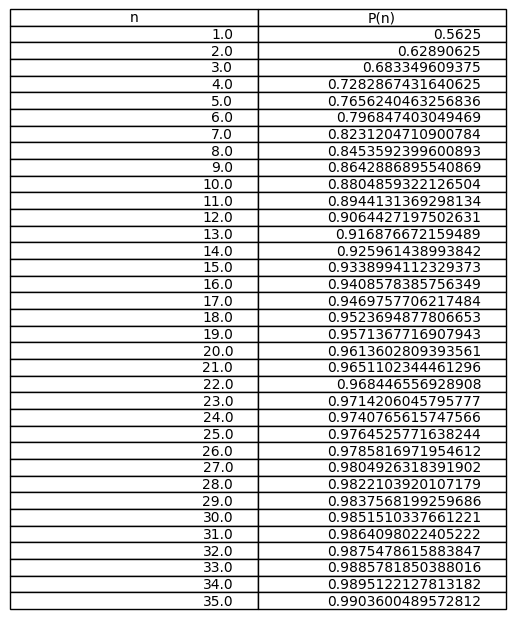

In [173]:
drow_table_of_results(resB)

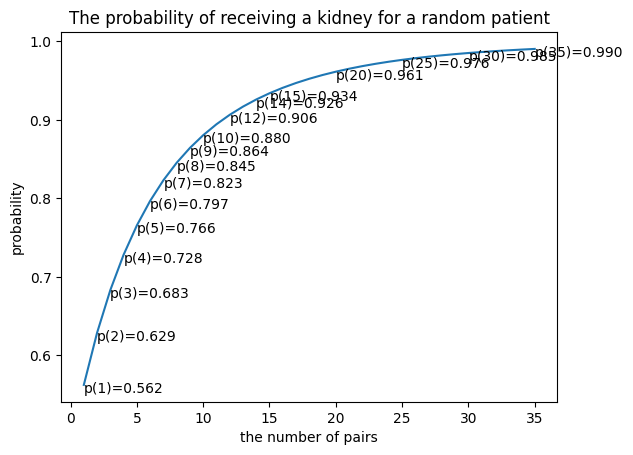

In [174]:
drow_resoults(resB)